<div style='text-align: center;'><font color=green size=5><b>Take Away Assignment</b><br><font size=3>Without HTML output

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df= pd.read_excel("DS_Python_Assignment.xlsx")
df.shape

(10000, 117)

In [34]:
df.dtypes

CUSTOMERID                  int64
STATE                      object
LCPCOUNT                    int64
PRIVATELABELTENDERFLAG     object
TENURE_IN_MONTHS          float64
                           ...   
MDAYQTY_L4Y                 int64
MDAYSHOPPER_L1Y             int64
MDAYSHOPPER_L2Y             int64
MDAYSHOPPER_L3Y             int64
MDAYSHOPPER_L4Y             int64
Length: 117, dtype: object

### 1. List down all the columns with missing values.

In [35]:
cols_with_null_values= []
for cols in df.columns:
    if df[cols].isnull().sum()!=0:
        cols_with_null_values.append(cols)
        
for cols in cols_with_null_values:
    print(cols, end='    ')
print("\n"f'The total number of columns with Null values are {len(cols_with_null_values)}')

STATE    TENURE_IN_MONTHS    CLOSESTSTOREDISTANCE    AGE    INCOME    LENGTH OF RESIDENCE    NUMBER OF PERSONS IN LIVING UNIT    NUMBER OF ADULTS IN LIVING UNIT    MOSAIC    CAPE: AGE: POP: MEDIAN AGE    CAPE: AGE: POP: % 0-17    CAPE: AGE: POP: % 18-99+    CAPE: AGE: POP: % 65-99+    CAPE: ETHNIC: POP: % WHITE ONLY    CAPE: ETHNIC: POP: % BLACK ONLY    CAPE: ETHNIC: POP: % ASIAN ONLY    CAPE: ETHNIC: POP: % HISPANIC    CAPE: DENSITY: PERSONS PER HH FOR POP IN HH    CAPE: HHSIZE: HH: AVERAGE HOUSEHOLD SIZE    CAPE: TYP: HH: % MARRIED COUPLE FAMILY    CAPE: CHILD: HH: % WITH PERSONS LT18    CAPE: CHILD: HH: % MARR COUPLE FAMW- PERSONS LT18    CAPE: CHILD: HH: % MARR COUPLE FAMW-O PERSONS LT18    CAPE: LANG: HH: % SPANISH SPEAKING    CAPE: EDUC: POP25+: MEDIAN EDUCATION ATTAINED    CAPE: HOMVAL: OOHU: MEDIAN HOME VALUE    CAPE: BUILT: HU: MEDIAN HOUSING UNIT AGE    CAPE: TENANCY: OCCHU: % OWNER OCCUPIED    CAPE: TENANCY: OCCHU: % RENTER OCCUPIED    CAPE: EDUC: ISPSA    CAPE: EDUC: ISPSA 

### 2. Categotize the columns based upon their data type and print, for ex: print all the numeric variables and other data types as well

In [36]:
int_type= []
float_type= []
object_type= []
for cols in df.columns:
    if df[cols].dtypes == 'int64':
        int_type.append(cols)
    if df[cols].dtypes == 'float64':
        float_type.append(cols)
    if df[cols].dtypes == 'O':
        object_type.append(cols)

print('INTEGER COLUMNS')
for i in int_type:
    print(i, end='    ')
print('\n'"The total number of Columns with Integer data type are", len(int_type),"\n")

print('FLOAT COLUMNS')
for i in float_type:
    print(i, end='    ')
print('\n'"The total number of Columns with Float data type are", len(float_type),"\n")

print('OBJECT COLUMNS')
for i in object_type:
    print(i, end='    ')
print('\n'"The total number of Columns with Object data type are", len(object_type))

INTEGER COLUMNS
CUSTOMERID    LCPCOUNT    FEMALE    HS_DIPLOMA    SOME_COLLEGE    BACH_GRAD_DEG    LT_HS_DIPLOMA    MARRIED    MNGMNT_OFFICEADMIN    TECH_PROF    SALES_JOB    BLUE_COLLAR    FARMER    RETIRED    SFDU    MFDU    HOMEOWNER    MAIL_RESP_MULTI    MAIL_RESP_SINGLE    METRO    URBAN    MOR BANK: UPSCALE MERCHANDISE BUYER    MOR BANK: MALE MERCHANDISE BUYER    MOR BANK: FEMALE MERCHANDISE BUYER    MOR BANK: CRAFTS-HOBBY MERCHANDISE BUYER    MOR BANK: GARDENING-FARMING BUYER    MOR BANK: BOOK BUYER    MOR BANK: COLLECT-SPECIAL FOODS BUYER    MOR BANK: GIFTS AND GADGETS BUYER    MOR BANK: GENERAL MERCHANDISE BUYER    MOR BANK: FAMILY AND GENERAL MAGAZINE    MOR BANK: FEMALE ORIENTED MAGAZINE    MOR BANK: MALE SPORTS MAGAZINE    MOR BANK: RELIGIOUS MAGAZINE    MOR BANK: GARDENING-FARMING MAGAZINE    MOR BANK: CULINARY INTERESTS MAGAZINE    MOR BANK: HEALTH AND FITNESS MAGAZINE    MOR BANK: DO-IT-YOURSELFERS    MOR BANK: NEWS AND FINANCIAL    MOR BANK: PHOTOGRAPHY    MOR BANK: OPP

### 3. List the columns with duplicates a) Remove them b) Print before and after

In [37]:
# created a copy of dataset df as df_copy1 to for performing cleaning based on duplicate values.
df_copy1= df.copy()
duplicated_cols= []
duplicated_values= []
for cols in df_copy1.columns:
    if df_copy1[cols].duplicated().sum() != 0:
        duplicated_cols.append(cols)
        duplicated_values.append(df_copy1[cols].duplicated().sum())
len(duplicated_cols)  == len(duplicated_values)

True

#### All the columns with Duplicate values

In [38]:
df_duplicated = pd.DataFrame({"columns_names":duplicated_cols, "duplicated_values": duplicated_values})
df_duplicated

,columns_names,duplicated_values
0,STATE,9941
1,LCPCOUNT,9972
2,PRIVATELABELTENDERFLAG,9998
3,TENURE_IN_MONTHS,9706
4,CLOSESTSTOREDISTANCE,1591
...,...,...
111,MDAYQTY_L4Y,9994
112,MDAYSHOPPER_L1Y,9998
113,MDAYSHOPPER_L2Y,9998
114,MDAYSHOPPER_L3Y,9998


In [39]:
for cols in df_copy1.columns:
    df_copy1.drop_duplicates(cols, inplace=True)

#### Before removing Duplicates
I'll check for duplicates values in the original dataframe df.

In [40]:
for cols in df.columns:
    print(df[cols].duplicated().sum(), end="    ")

0    9941    9972    9998    9706    1591    9998    9930    9998    9998    9998    9998    9999    9998    9998    9998    9998    9998    9998    9998    9998    9998    9987    9998    9998    9938    9990    9990    9998    9998    9996    9996    9993    9995    9997    9990    9996    9996    9993    9992    9996    9996    9998    9995    9996    9990    9993    9990    9998    9991    9993    9992    9995    9995    9993    9995    9983    9979    9347    9928    9999    9939    9613    9613    9533    9090    9285    9614    9196    9687    9687    9248    9387    9456    9490    9316    9926    4476    9924    9096    9096    7879    9989    9989    4650    9976    9964    6391    9982    9971    7590    9457    9338    9307    8643    9523    9943    9999    9925    9997    9931    9572    9946    9988    9753    9843    9993    9855    9895    9993    9996    9994    9994    9998    9998    9998    9998    

#### After removing Duplicates
I'll use the df_copy1 dataframe to verify if the duplicate values for each column has been deleted or not.

In [41]:
for cols in df_copy1.columns:
    print(df_copy1[cols].duplicated().sum(), end="    ")

0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    

### 4. List the constant columns a) Remove them b) Print before and after

In [42]:
constant_cols=[]
for cols in df.columns:
    if df[cols].nunique()==1:
        constant_cols.append(cols)
        
print(f'There are {len(constant_cols)} constant columns in the dataset. Their names are: {[i for i in constant_cols]}')

There are 3 constant columns in the dataset. Their names are: ['MARRIED', 'CHILDREN', '7-Cost Only Spend']


#### After removal

In [43]:
print(f"The Number of columns before deleting the Constant columns is {df.shape[1]}")
for cols in constant_cols:
    df.drop(cols, axis=1, inplace=True)
    
print(f"The Number of columns after deleting the Constant columns is {df.shape[1]}")

The Number of columns before deleting the Constant columns is 117
The Number of columns after deleting the Constant columns is 114


### 5. Create box plot to visualise the outliers of all the numeric columns

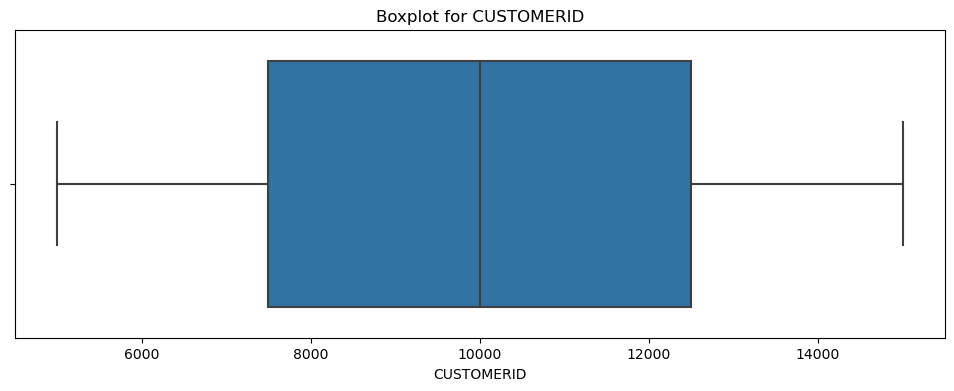

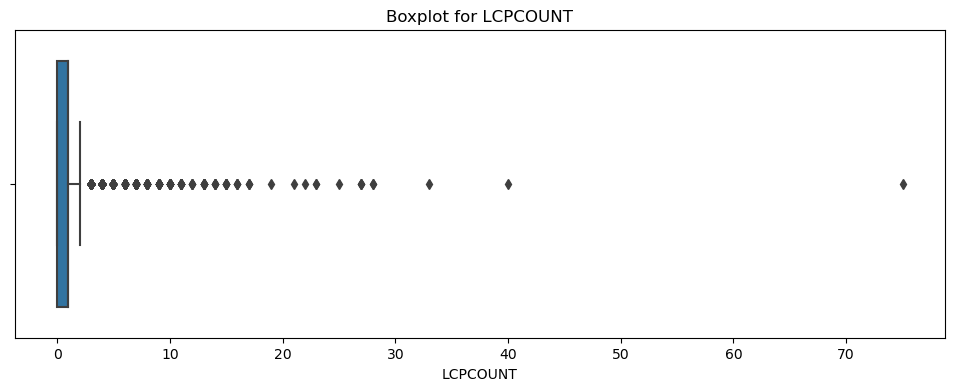

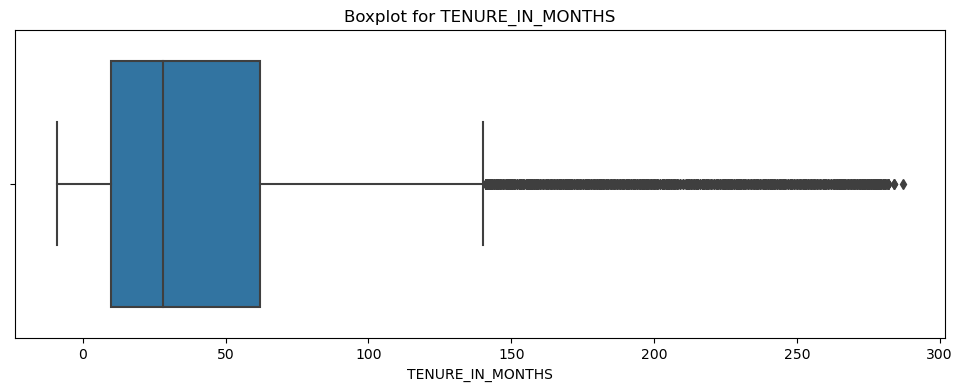

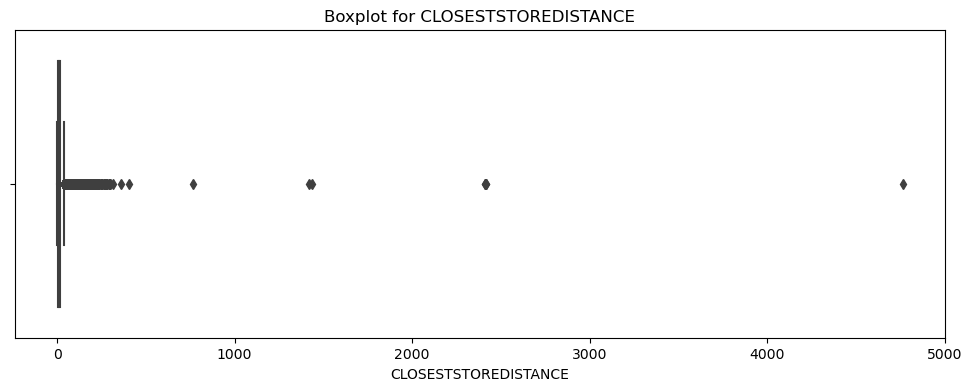

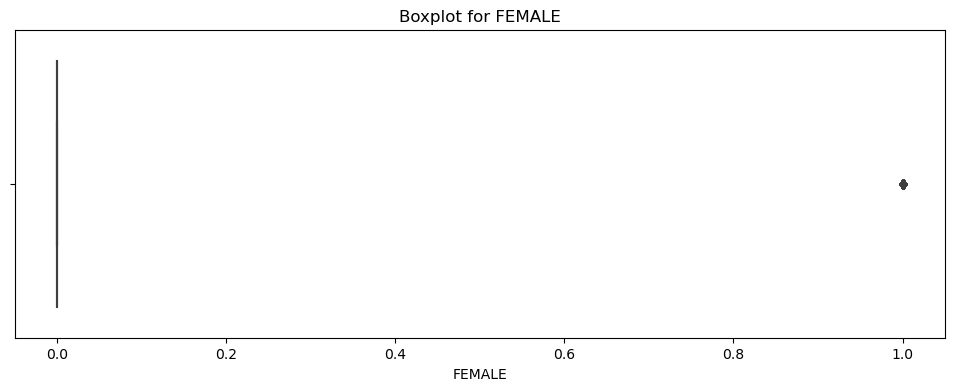

In [44]:
for cols in df.select_dtypes(include=['number']).columns[:5]:
    if (df[cols].dtypes)!=object:
        plt.figure(figsize=(12,4))
        sns.boxplot(x=df[cols])
        plt.title(f'Boxplot for {cols}')
        plt.show()

### 6. Create charts for any 6 columns and show their distribution

In [45]:
cols_with_morethen50_values= []
for col in df.columns:
    if df[col].nunique()>200:
        cols_with_morethen50_values.append(col)

<font color=teal> A. Distibution of TENURE_IN_MONTHS

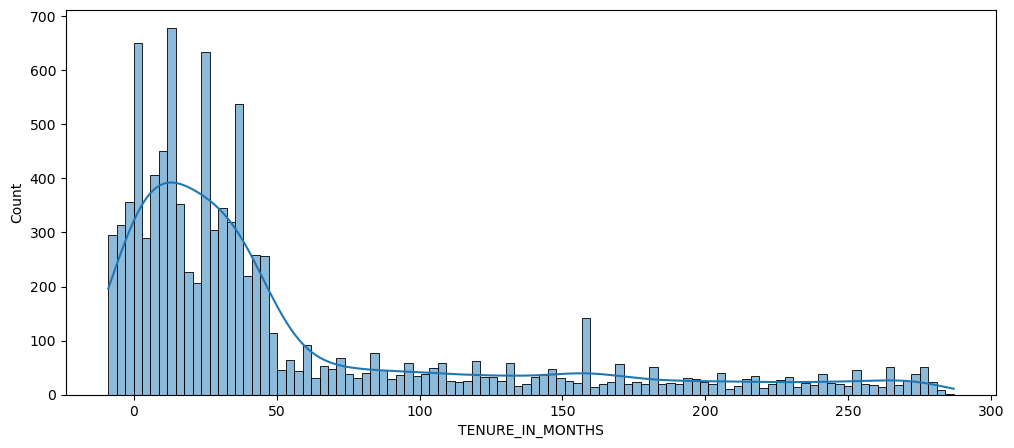

In [46]:
plt.figure(figsize=(12,5))
sns.histplot(df['TENURE_IN_MONTHS'], bins=100, kde=True)
plt.show()

<font color= purple size=3>From the above chart we see the distribution of TENURE_IN_MONTHS is right skewed with a very long tail representing a long range of outliers which means most of the employees' Tenure in Months is between 0-50 months but there some employees' with more than 50 months of tenure extending approximately upto 300 months. Also we can conclude that because of this distribution the mean of this column is pulled towards the right side.

<font color=teal> B. Strip plot for Total Sales

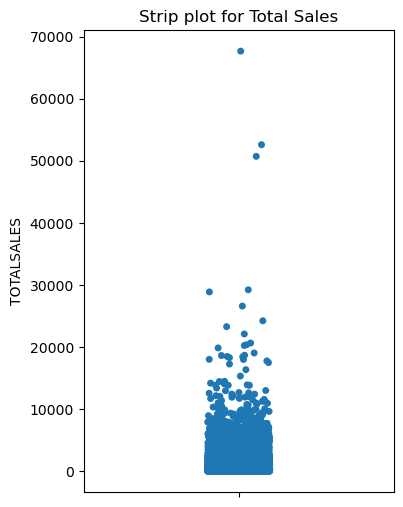

In [47]:
plt.figure(figsize=(4,6))
sns.stripplot(y=df['TOTALSALES'])
plt.title('Strip plot for Total Sales')
plt.show()

<font color=purple size=3>From the above Violin plot we see that most of the Sales values are distributed in the range of 0-10,000 and then some of the values in the range 10,000 - 20,000 and a few values are in the range 30,000 - 70,000.

<font color=teal> C. Pie Plot

In [48]:
r1= df['PRIVATELABELTENDERFLAG'].value_counts()
r1

N    7859
Y    2141
Name: PRIVATELABELTENDERFLAG, dtype: int64

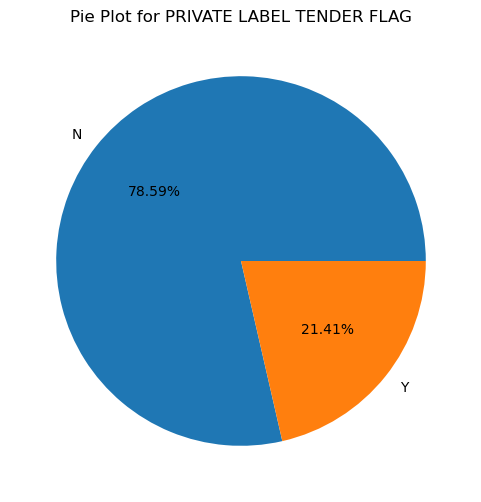

In [49]:
plt.figure(figsize=(6,6))
plt.pie(x=r1.values, labels=r1.index, autopct="%.2f%%")
plt.title('Pie Plot for PRIVATE LABEL TENDER FLAG')
plt.show()

<font color=teal> D. Bar Plot

In [50]:
r2= df['INCOME'].value_counts().sort_index().reset_index()
r2.rename(columns={'index': 'Income', 'INCOME': 'Count of Customers'}, inplace=True)

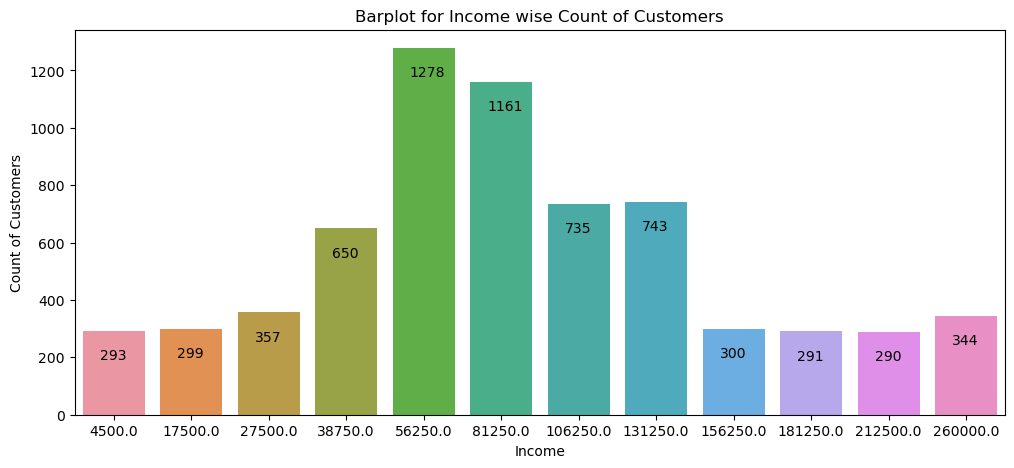

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(data=r2, x='Income', y='Count of Customers')
for idx, value in enumerate(r2['Count of Customers']):
    plt.annotate(value, xy=(idx-.18, value-100))
plt.title('Barplot for Income wise Count of Customers')
    
plt.show()

<font color=teal> E. Scatter Plot

In [52]:
r3= df['LENGTH OF RESIDENCE'].value_counts()

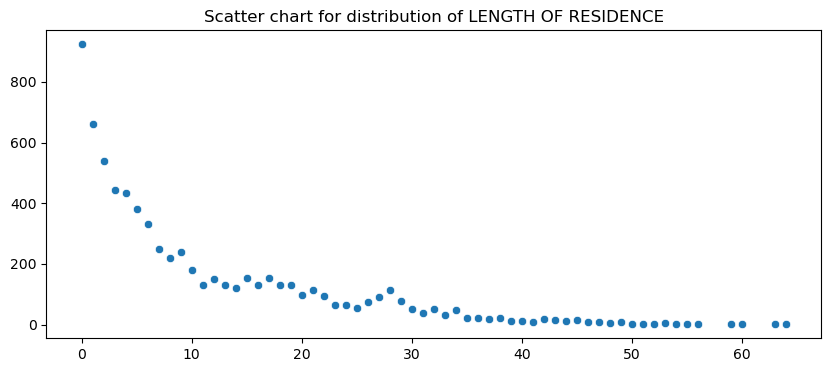

In [53]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=r3.index, y=r3.values)
plt.title('Scatter chart for distribution of LENGTH OF RESIDENCE')
plt.show()

<font color='teal'> F. Age Distribution

<Figure size 1200x500 with 0 Axes>

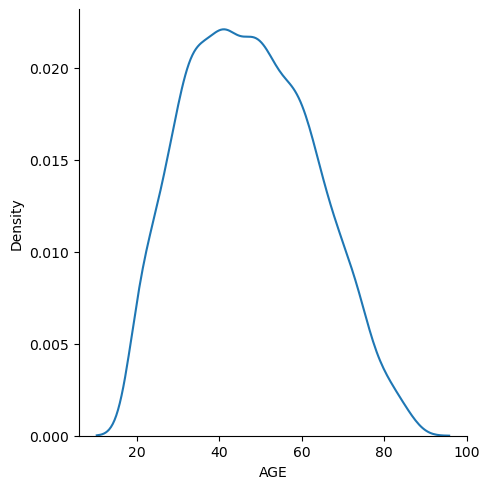

In [54]:
plt.figure(figsize=(12,5))
sns.displot(x= df['AGE'], kind='kde')
plt.show()

<font color=purple size=3>From the above chart its clear that the Age distribution follows the Normal Distribution curve.